# **Machine Learning-Driven Apartment Price Prediction in Daegu**


Data resource:  [Data Daegu Apartment](https://www.kaggle.com/datasets/gunhee/koreahousedata)
Contents

- Business Problem Understanding
- Data Understanding
- Data Preprocessing
- Modelling
- Conclusion
- Rekomendation


## **Business Problem Understanding**

<div class="alert alert-block alert-success">

### **Context**

In South Korea, Perticularly in a densed city like Dageu, apartments become the main residing option. People shifted from traditional Economically brick and mortal house to hih rised appartments to fullfil the need to efficiently utilize limited urban space. This trend is supported by govermant policies aimed at quickly addressing housing shortages making appartments one of the most suitable urban planning strategies. 


### **Problem Statement**

South Korea's housing market is currently grappling with a significant challenge: the constant increase in the number of unsold finished homes, which are often referred to as "dangerous unsold homes." As of May 2024, the Ministry of Land, Infrastructure and Transport reported 13,230 unsold finished homes across the country, an increase of 2% from the previous month. One of the hardest-hit regions was Daegu, with 1,506 units not sold, underscoring the acute nature of the problem in the city.

This surge in unsold properties is a major obstacle for real estate agents in Daegu, especially in determining the optimal price for apartment advertisements. Traditional pricing methods, which involve manual comparisons of similar properties and market trends, have proven to be inefficient and prone to errors. In a market filled with unsold homes, the absence of a data-driven approach results in inconsistent prices, leading to long periods of vacancy or significant revenue losses across Daegu.


### **Goal**

The primary goal of this project is to develop a **machine learning model** that can accurately **predict apartment prices** in Daegu. By leveraging various factors such as apartment type, proximity to transportation, amenities, and historical market data, this model will provide real estate agencies with reliable pricing recommendations. The ultimate aim is to enhance efficiency, improve accuracy, and offer a strategic advantage in a highly competitive and challenging market.

---

### **Analytic Approach**

This project will follow a systematic and structured analytical approach:

1. **Data Understanding:** Conduct a thorough analysis of the dataset to identify key variables that influence apartment prices.

2. **Data Preprocessing:** Clean and transform the data to make it suitable for modeling. This step includes handling missing values, encoding categorical variables, and scaling numerical features.
3. **Feature Engineering:** Develop new features that capture complex relationships within the data, such as building age and aggregated proximity scores.
4. **Model Development:** Build and evaluate multiple regression models, including linear regression, decision trees, and ensemble methods, to determine the most effective approach for price prediction.
5. **Model Tuning and Validation:** Fine-tune model parameters using advanced techniques such as cross-validation and grid search to optimize performance.


---

### **MAtric Evaluation**

The performance of the predictive model will be evaluated using the following metrics:

- **Root Mean Square Error (RMSE):** A measure that quantifies the average magnitude of the error. Lower RMSE values indicate a more accurate model.
RMSE is the square root of the average of the squared differences between predicted and actual values. It provides a measure of how much error to expect between the predicted values and the actual values.

$$ 
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

- \( y_i \): The actual value for the \(i\)-th observation.
- \( \hat{y}_i \): The predicted value for the \(i\)-th observation.
- \( n \): The total number of observations


- **Mean Absolute Error (MAE):** The average of the absolute differences between predicted and actual prices, providing a measure of accuracy.
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It indicates how far off, on average, predictions are from the actual values.

$$ 
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i | 
$$

- \( y_i \): The actual value for the \(i\)-th observation.
- \( \hat{y}_i \): The predicted value for the \(i\)-th observation.
- \( n \): The total number of observations.

-**MAPE** expresses the error as a percentage of the actual data, making it easier to interpret in context. It shows how large the errors are in relation to the actual values.

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right| \times 100
$$

- \( y_i \): The actual value for the \(i\)-th observation.
- \( \hat{y}_i \): The predicted value for the \(i\)-th observation.
- \( n \): The total number of observations.
- \( \left|\frac{y_i - \hat{y}_i}{y_i}\right| \): The absolute percentage error for the \(i\)-th observation.




## **Data Understanding**

<div class="alert alert-block alert-success">

### **Dataset Information** 
The dataset contains information on various apartments in Daegu, including their features and market prices.

| **Attribute** | **Description** |
| --- | --- |
| **Hallway Type** | Apartment type |
| **TimeToSubway** | Time needed to the nearest subway station |
| **SubwayStation** | The name of the nearest subway station |
| **N_FacilitiesNearBy(ETC)** | The number of facilities nearby |
| **N_FacilitiesNearBy(PublicOffice)** | The number of public office facilities nearby |
| **N_SchoolNearBy(University)** | The number of universities nearby |
| **N_Parkinglot(Basement)** | The number of the parking lot |
| **YearBuilt** | The year the apartment was built |
| **N_FacilitiesInApt** | Number of facilities in the apartment |
| **Size(sqft)** | The apartment size (in square feet) |
| **SalePrice** | The apartment price (Won) |

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings

warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('data_daegu_apartment.csv')
df.head(3)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946


### **Exploratory Data Analysis**

In [4]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


**Insights:**

- There is a wide range of apartment prices, with some potentially high-priced outliers.
- Some properties do not have basement parking.
- Facility's range from 1 to 10 facilities, showing variability in the amenities available within the apartment complexes.

In [5]:
print(df.isnull().sum())

if df.isnull().sum().sum() == 0:
    print("\033[92mThe dataset has no NaN values.\033[0m") 

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64
The dataset has no NaN values.


### Distribution of Key Variables

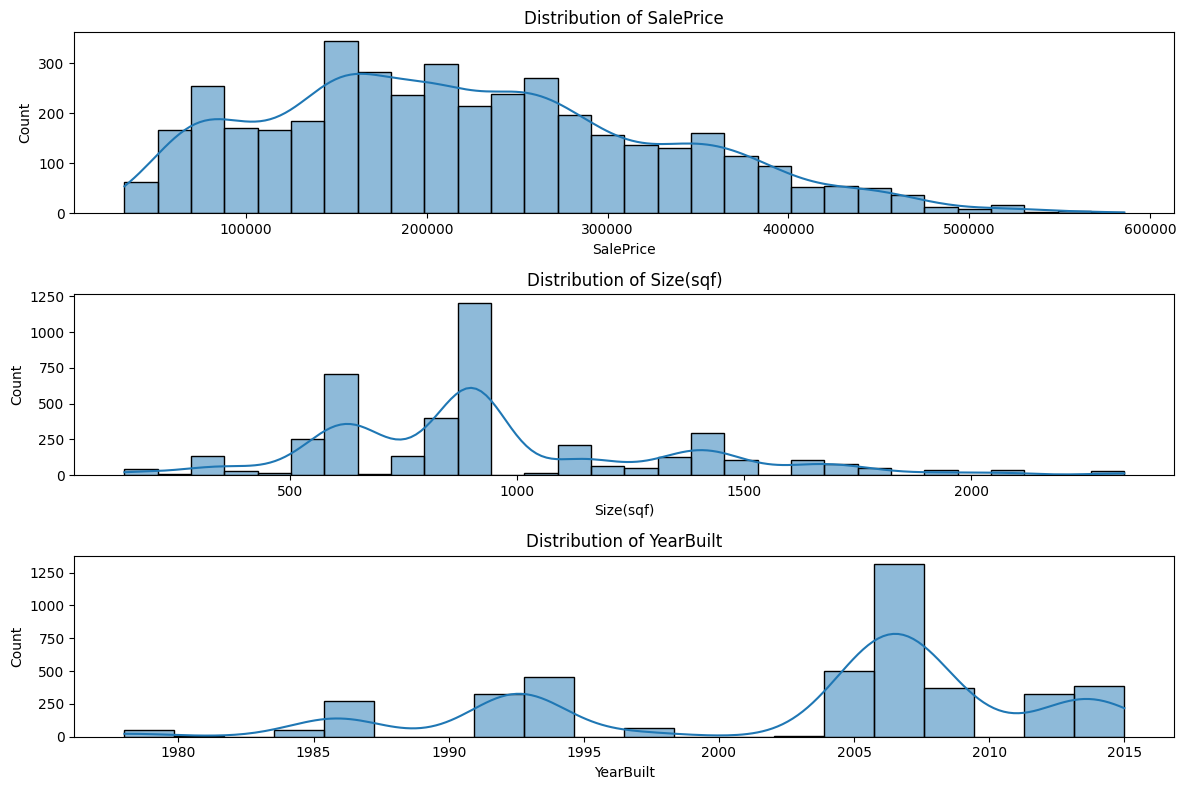

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
plt.figure(figsize=(12, 8))

# Distribution of SalePrice
plt.subplot(3, 1, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')

# Distribution of Size(sqf)
plt.subplot(3, 1, 2)
sns.histplot(df['Size(sqf)'], kde=True, bins=30)
plt.title('Distribution of Size(sqf)')

# Distribution of YearBuilt
plt.subplot(3, 1, 3)
sns.histplot(df['YearBuilt'], kde=True, bins=20)
plt.title('Distribution of YearBuilt')

plt.tight_layout()
plt.show()

**Insights:**
- The distribution of SalePrice shows a right-skewed pattern, indicating that while most apartments are priced below the mean, there are some high-priced properties that drive the average up.
- The distribution of Size(sqf) also appears to be right-skewed, with most apartments being of smaller size, and a few larger apartments significantly increasing the range.
- The YearBuilt distribution suggests that most of the apartments in the dataset were built between the 1990s and the 2010s, with fewer properties built before 1990.
- 

### Corelation Analysis

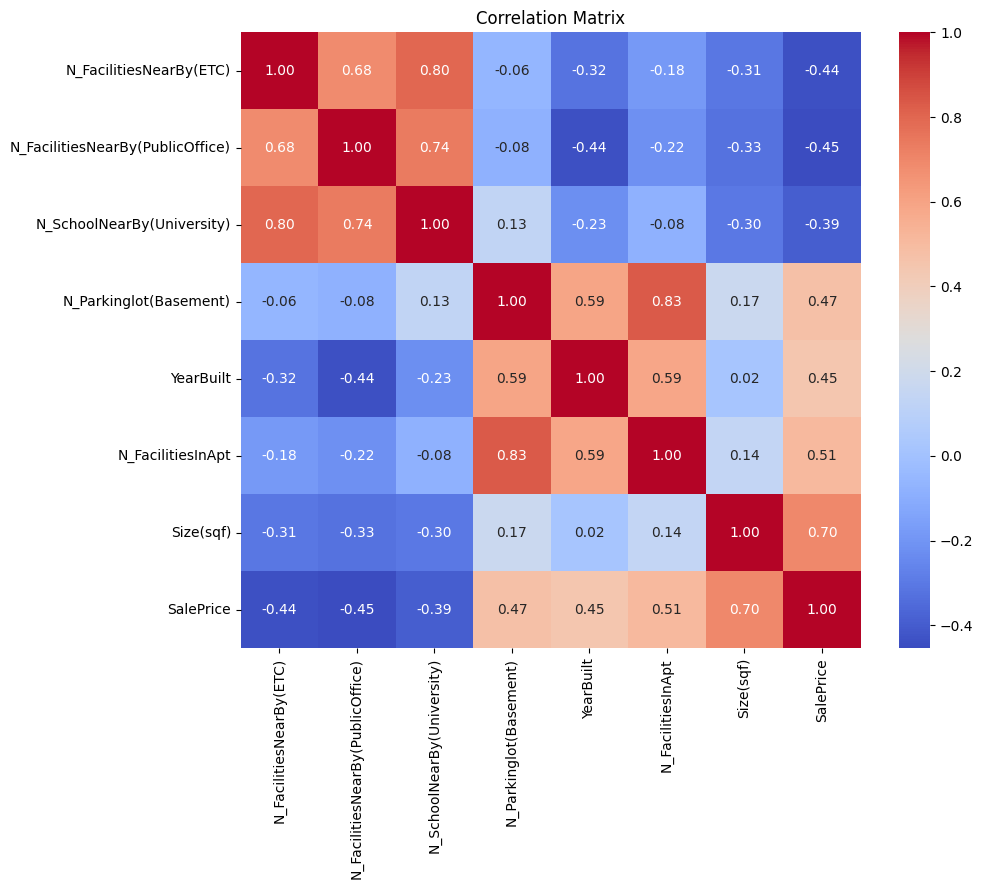

In [7]:
# Correlation matrix
correlation_matrix = df.corr()

# Set up the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

**Insights**

- **Size(sqf)** and **YearBuilt** are the most influential factors positively impacting apartment prices in Daegu.
- **N_FacilitiesNearBy(ETC)** (other nearby facilities) also shows a negative correlation with SalePrice, suggesting that in some cases, proximity to these facilities might be associated with lower prices, potentially due to noise, congestion, or other undesirable aspects.

### **Distribution of Categorical Variables**

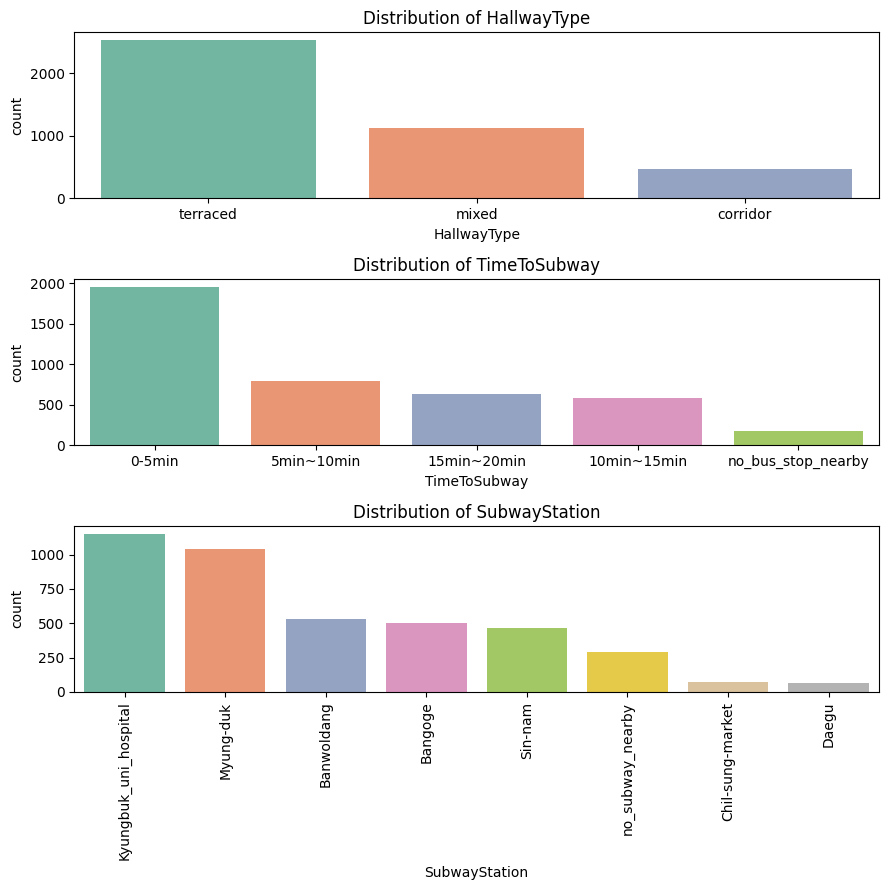

In [8]:
# Visualization of categorical variables
plt.figure(figsize=(9, 9))

# Distribution of HallwayType
plt.subplot(3, 1, 1)
sns.countplot(x='HallwayType', data=df, palette='Set2')
plt.title('Distribution of HallwayType')

# Distribution of TimeToSubway
plt.subplot(3, 1, 2)
sns.countplot(x='TimeToSubway', data=df, palette='Set2', order=df['TimeToSubway'].value_counts().index)
plt.title('Distribution of TimeToSubway')

# Distribution of SubwayStation
plt.subplot(3, 1, 3)
sns.countplot(x='SubwayStation', data=df, palette='Set2', order=df['SubwayStation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of SubwayStation')

plt.tight_layout()
plt.show()


Insights:

- HallwayType: The dataset shows variability in the types of hallways, with "terraced" and "mixed" being common. This variable could potentially influence apartment pricing, depending on buyer preferences.
- TimeToSubway: The majority of the properties are within a 0-5 minute or 10-15 minute walking distance to the nearest subway station. Proximity to subway stations is a crucial factor in urban real estate pricing.
- SubwayStation: The distribution of properties near different subway stations shows that certain stations are more common in the dataset, which could reflect key residential areas in Daegu.

### **Sales Price across different categories**

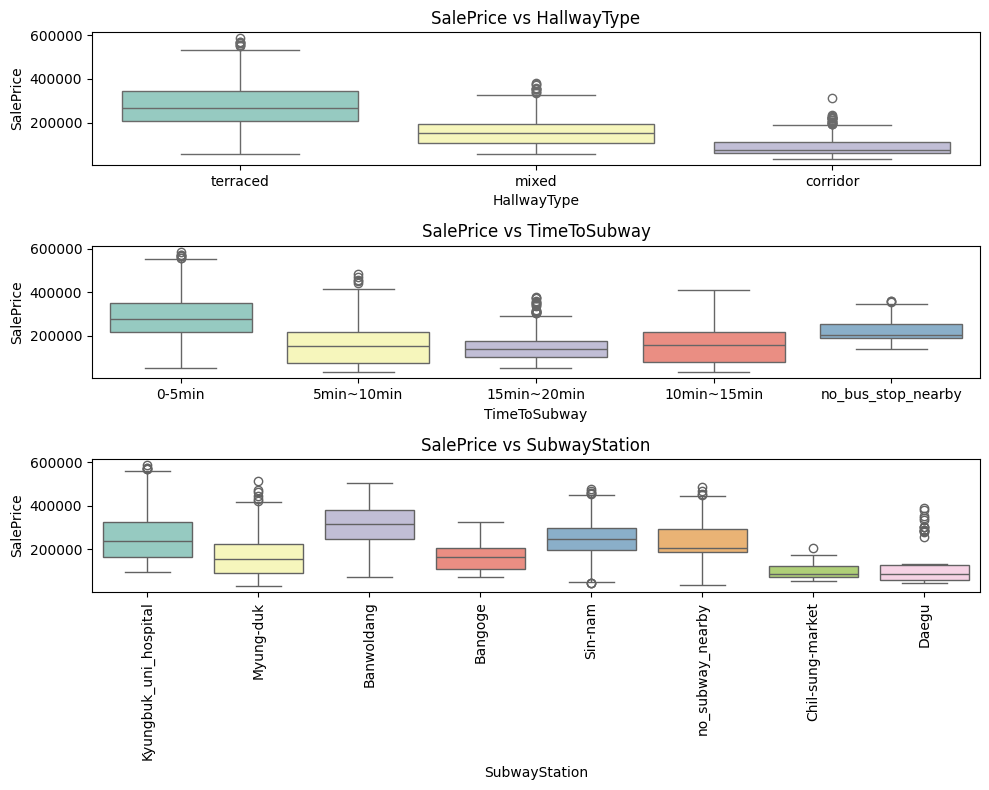

In [9]:
# Box plots of SalePrice across different categories
plt.figure(figsize=(10, 8))

# SalePrice vs HallwayType
plt.subplot(3, 1, 1)
sns.boxplot(x='HallwayType', y='SalePrice', data=df, palette='Set3')
plt.title('SalePrice vs HallwayType')

# SalePrice vs TimeToSubway
plt.subplot(3, 1, 2)
sns.boxplot(x='TimeToSubway', y='SalePrice', data=df, palette='Set3', order=df['TimeToSubway'].value_counts().index)
plt.title('SalePrice vs TimeToSubway')

# SalePrice vs SubwayStation
plt.subplot(3, 1, 3)
sns.boxplot(x='SubwayStation', y='SalePrice', data=df, palette='Set3', order=df['SubwayStation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('SalePrice vs SubwayStation')

plt.tight_layout()
plt.show()


**Relationship Between Categorical Variables and SalePrice:**

- HallwayType: The box plot shows that certain hallway types, like "terraced," are associated with higher median apartment prices. This could be due to architectural preferences or perceived quality.
- TimeToSubway: Apartments closer to subway stations (0-5 min) generally have higher prices, reinforcing the importance of accessibility in determining property value.
- SubwayStation: There is variability in pricing based on the subway station, suggesting that some locations are more desirable or prestigious, contributing to higher property values.


### **Checking Outliers**

In [10]:
# Columns of interest for outlier detection
columns_of_interest = [
    'N_FacilitiesNearBy(ETC)', 
    'N_FacilitiesNearBy(PublicOffice)', 
    'N_SchoolNearBy(University)', 
    'N_Parkinglot(Basement)', 
    'N_FacilitiesInApt', 
    'Size(sqf)', 
    'SalePrice'
]

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers = pd.concat([outliers, df[outlier_mask]])
    return outliers.drop_duplicates()

# Detect outliers
outliers = detect_outliers_iqr(df, columns_of_interest)

# Display the outliers found
outliers


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
106,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,243362
134,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,2056,424778
207,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,348283
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
288,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,300884
...,...,...,...,...,...,...,...,...,...,...,...
2015,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,517699
2100,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1519,530973
3502,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,1085,515044
3939,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,513274


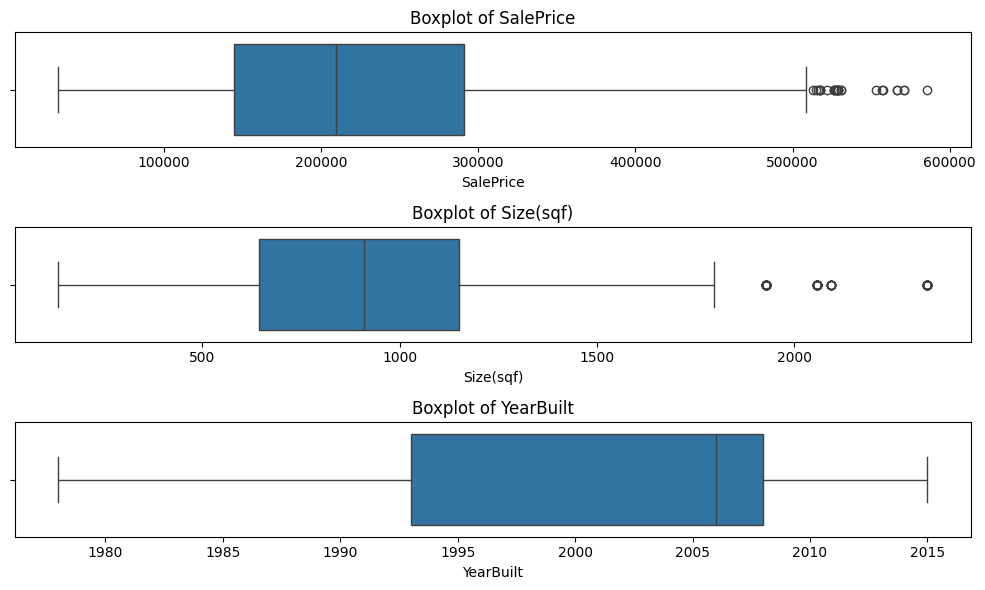

(27, 98)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifying outliers using box plots for key features
plt.figure(figsize=(10, 6))

# Boxplot for SalePrice
plt.subplot(3, 1, 1)
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of SalePrice')

# Boxplot for Size(sqf)
plt.subplot(3, 1, 2)
sns.boxplot(x=df['Size(sqf)'])
plt.title('Boxplot of Size(sqf)')

# Boxplot for YearBuilt (outliers are less likely here but included for completeness)
plt.subplot(3, 1, 3)
sns.boxplot(x=df['YearBuilt'])
plt.title('Boxplot of YearBuilt')

plt.tight_layout()
plt.show()

# Identifying outliers using the IQR method for SalePrice and Size(sqf)
Q1_saleprice = df['SalePrice'].quantile(0.25)
Q3_saleprice = df['SalePrice'].quantile(0.75)
IQR_saleprice = Q3_saleprice - Q1_saleprice
lower_bound_saleprice = Q1_saleprice - 1.5 * IQR_saleprice
upper_bound_saleprice = Q3_saleprice + 1.5 * IQR_saleprice

Q1_size = df['Size(sqf)'].quantile(0.25)
Q3_size = df['Size(sqf)'].quantile(0.75)
IQR_size = Q3_size - Q1_size
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size

outliers_saleprice = df[(df['SalePrice'] < lower_bound_saleprice) | (df['SalePrice'] > upper_bound_saleprice)]
outliers_size = df[(df['Size(sqf)'] < lower_bound_size) | (df['Size(sqf)'] > upper_bound_size)]

len(outliers_saleprice), len(outliers_size)


**Insights**
Outlier Counts:
- SalePrice: There are 27 outliers.
- Size(sqf): There are 98 outliers.

In [12]:
# Filter the data where SalePrice is an outlier
outliers_saleprice_data = df[(df['SalePrice'] < lower_bound_saleprice) | (df['SalePrice'] > upper_bound_saleprice)]

# Filter the data where Size(sqf) is an outlier
outliers_size_data = df[(df['Size(sqf)'] < lower_bound_size) | (df['Size(sqf)'] > upper_bound_size)]

# Filter the data where both SalePrice and Size(sqf) are outliers
outliers_both_data = df[((df['SalePrice'] < lower_bound_saleprice) | (df['SalePrice'] > upper_bound_saleprice)) &
                        ((df['Size(sqf)'] < lower_bound_size) | (df['Size(sqf)'] > upper_bound_size))]

outliers_saleprice_data
# outliers_size_data
# outliers_both_data


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
204,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
549,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,553097
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796
656,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,528318
669,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,517699
971,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,529203
1180,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,530973
1295,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1519,526548
1877,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,515929


### **Handeling Outliers**

I chose capping outliers to maintain data integrity by reducing the impact of extreme values without losing important information, ensuring a balanced and robust dataset for more accurate analysis and modeling.

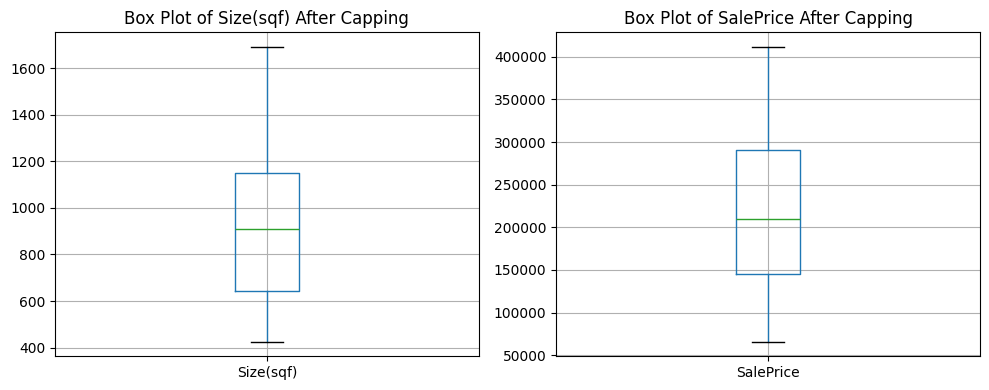

,Size(sqf),SalePrice
count,4123.000000,4123.000000
mean,949.709192,220011.973563
std,344.496685,100484.894984
min,426.000000,65929.000000
25%,644.000000,144752.000000
50%,910.000000,209734.000000
75%,1149.000000,291150.000000
max,1690.000000,411504.000000


In [13]:
# Calculate the 5th and 95th percentiles for Size(sqf) and SalePrice
lower_cap_size = df['Size(sqf)'].quantile(0.05)
upper_cap_size = df['Size(sqf)'].quantile(0.95)

lower_cap_price = df['SalePrice'].quantile(0.05)
upper_cap_price = df['SalePrice'].quantile(0.95)

# Apply the capping
df['Size(sqf)'] = df['Size(sqf)'].clip(lower=lower_cap_size, upper=upper_cap_size)
df['SalePrice'] = df['SalePrice'].clip(lower=lower_cap_price, upper=upper_cap_price)

# Display the new summary statistics and box plots to confirm the capping
summary_stats_after_capping = df[['Size(sqf)', 'SalePrice']].describe()

# Plot the capped data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df.boxplot(column=['Size(sqf)'])
plt.title('Box Plot of Size(sqf) After Capping')

plt.subplot(1, 2, 2)
df.boxplot(column=['SalePrice'])
plt.title('Box Plot of SalePrice After Capping')

plt.tight_layout()
plt.show()

summary_stats_after_capping


## **Modeling**

### Prepare Two Different feature Sets

**s1: Basic Feature Set**
- Features: Size(sqf), YearBuilt, N_Parkinglot(Basement), N_FacilitiesInApt, HallwayType (One-Hot Encoded), TimeToSubway (One-Hot Encoded), SubwayStation (One-Hot Encoded)
- Reason: This set includes the most straightforward and directly related features to apartment pricing. It focuses on fundamental characteristics like size, age, parking, and facilities, combined with categorical variables that are encoded simply to maintain model interpretability and minimize complexity.

**s2: Enhanced Feature Set**

- Features: Size(sqf) (Log-transformed), YearBuilt, N_Parkinglot(Basement), N_FacilitiesInApt, HallwayType (Target Encoded), TimeToSubway (Target Encoded), SubwayStation (Target Encoded), Size(sqf) * YearBuilt (Interaction Term), N_FacilitiesInApt * N_Parkinglot(Basement) (Interaction Term), Polynomial Features of Size(sqf)
- Reason: This set includes more advanced features, such as interaction terms and polynomial features, to capture more complex relationships in the data. Log transformation and target encoding are used to handle skewness and improve predictive power, particularly for categorical variables with many levels. The aim is to enhance model performance by leveraging deeper feature interactions and more sophisticated encoding methods.


**Matric Evaluation**
- RMSE: I want to identify how significant the errors are to predict the apartment prices. 
- MAE: I want to have a clear, intrepetable measure of average error in dollar terms.
- MAPE: Since the prices are widely scaled, I want to understand the error in relaive term/ percentage.



#### **Formulate the Business Metric:**

Price mean: 207964
I use price mode because the data has extreme value


**Over prediction Loss (OPL)**

- **Holding Cost**: maintaining unsdold property cost including taxes 0,25%, maintenace 2%, insuranc 0.15%/ year
- **Example** if a property is over predict by 20,000 and remain unsold for 60 days 519.91 + 415.928+311.945= 1247.781/ year = 104 USD/month

**Under prediction Loss (UPL)**
- **Dirrect finnacial loss**: the different between the market value and the actual selling
- **Example**: If a property is under predict by 10000 then the loss would be 10000

Since under predict cost is the actual lost, we can just focus on the Over prediction loss in the matric

In [14]:
overpredict_cost= 104
print(f'The cost of over predicted price is {overpredict_cost} usd per month')

The cost of over predicted price is 104 usd per month


In [15]:
# from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

# def loss_cost(y_pred, yTrue):
#     opl = np.where(y_pred > yTrue, (y_pred-yTrue)*104, 0)
#     return np.sum([opl])

# #create loss metric
# loss=make_scorer(score_func=loss_cost, greater_is_better=False)

In [16]:
import numpy as np
from sklearn.metrics import make_scorer

# Given cost for overprediction
overpredict_cost = 100
print(f'The cost of over predicted price is {overpredict_cost} USD per month')

def loss_cost(y_pred, yTrue):
    # Calculating the cost only where predictions are higher than actual values
    opl = np.where(y_pred > yTrue, (y_pred - yTrue) * overpredict_cost, 0)
    return np.sum(opl)

# Create the custom loss metric
loss = make_scorer(score_func=loss_cost, greater_is_better=False)


The cost of over predicted price is 100 USD per month


## Splitting data Seen and Unseen

splitting data into data seen and unseen where where seen data will be used for training and validation to predict unseen data

In [17]:
from sklearn.model_selection import train_test_split

# Data Parsing for splitting into data seen (train/validation) & unseen (test)
RANDOM_SEED = 42

# Split the dataset into training and testing sets
df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)


### Split data seen into train and validation

In [18]:
df_train, df_val = train_test_split(df_seen, test_size=0.2, random_state=RANDOM_SEED)


In [19]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


In [20]:
df.head(2)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442


### **Data Splitting** 

#### Feature Set 1

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_seen = df_seen.drop(columns=['SalePrice'])  # Features from df_seen
y_seen = df_seen['SalePrice']  # Target variable from df_seen


# 80-20 split for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_seen, y_seen, test_size=0.2, random_state=RANDOM_SEED)


#### **Prepare df Unseen for testing**

In [22]:
# Display the shapes of the resulting datasets
X_test = df_unseen.drop(columns=['SalePrice']) 
y_test = df_unseen['SalePrice']  

### **Setting up the pipeline**

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, KFold, cross_validate
import numpy as np
import pandas as pd


# Preprocessing setup
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), 
         ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
          'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
          'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']),
        ('time_subway', OrdinalEncoder(categories=[['0-5min', '5min~10min', '10min~15min', '15min~20min',
                                                    '20min~25min', '25min~30min', '30min~', 'no_bus_stop_nearby']]),
         ['TimeToSubway']),
        ('hallway', OneHotEncoder(drop='first'), ['HallwayType']),
        ('subway', OneHotEncoder(drop='first'), ['SubwayStation'])
    ],
    remainder='passthrough'
)

# Define Models with Logarithmic Transformation
models = {
    'Linear Regression': TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp),
    'K-Nearest Neighbors': TransformedTargetRegressor(KNeighborsRegressor(), func=np.log, inverse_func=np.exp),
    'Decision Tree': TransformedTargetRegressor(DecisionTreeRegressor(random_state=1), func=np.log, inverse_func=np.exp),
    'Random Forest': TransformedTargetRegressor(RandomForestRegressor(random_state=1), func=np.log, inverse_func=np.exp),
    'XGBoost': TransformedTargetRegressor(XGBRegressor(random_state=1), func=np.log, inverse_func=np.exp)
}

# Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {
    'Model': [],
    'Mean_RMSE': [],
    'Std_RMSE': [],
    'Mean_MAE': [],
    'Std_MAE': [],
    'Mean_MAPE': [],
    'Std_MAPE': [],
    'Mean_loss': [],
    'Std_loss':[]
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # RMSE
    rmse_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    rmse_scores = -rmse_scores  # Invert the scores because cross_val_score returns negative values
    
    # MAE
    mae_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores  # Invert the scores for the same reason
    
    # MAPE
    mape_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    mape_scores = -mape_scores  # Invert the scores for the same reason

    # loss
    loss_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=loss)
    
    # Store results
    results['Model'].append(model_name)
    results['Mean_RMSE'].append(rmse_scores.mean())
    results['Std_RMSE'].append(rmse_scores.std())
    results['Mean_MAE'].append(mae_scores.mean())
    results['Std_MAE'].append(mae_scores.std())
    results['Mean_MAPE'].append(mape_scores.mean())
    results['Std_MAPE'].append(mape_scores.std())
    results['Mean_loss'].append(loss_scores.mean())
    results['Std_loss'].append(loss_scores.std())

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_loss,Std_loss
0,Linear Regression,50723.961164,1337.295411,41191.958325,869.110111,0.210872,0.005057,-1.216593e+09,9.644379e+07
1,K-Nearest Neighbors,43871.886165,1032.159976,33430.702927,1227.524000,0.172214,0.005282,-9.628108e+08,9.268332e+07
2,Decision Tree,41235.154346,982.745636,31815.223289,970.858894,0.164112,0.006536,-9.350137e+08,6.151846e+07
3,Random Forest,41196.495251,970.227626,31849.078182,971.778403,0.164354,0.006195,-9.361975e+08,6.276870e+07
4,XGBoost,41191.242050,953.066631,31805.163234,937.973247,0.164137,0.006564,-9.342463e+08,6.011048e+07


**Analysis:**
- Random Forest and XGBoost are the best performers, with the lowest RMSE, MAE, and MAPE values, and they also exhibit consistent performance across different folds (low standard deviations).

#### **Feature Set 2**

In [24]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

# Split the data into features and target
X1 = df_seen.drop(columns=['SalePrice'])
y1 = df_seen['SalePrice']

# Further split into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=RANDOM_SEED)



# Function to apply log transformation
def log_transform(X):
    return np.log1p(X)

# Function to add a constant to avoid zeros
def add_constant(X, constant=1):
    return X + constant

# Feature Set 2 Preprocessing Pipeline
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('impute', SimpleImputer(strategy='median'), ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                                                     'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
                                                     'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']),
        ('add_constant', FunctionTransformer(add_constant), ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                                                             'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)']),
        ('time_subway', OrdinalEncoder(categories=[['0-5min', '5min~10min', '10min~15min', '15min~20min',
                                                    '20min~25min', '25min~30min', '30min~', 'no_bus_stop_nearby']]),
         ['TimeToSubway']),
        ('hallway', OneHotEncoder(drop='first'), ['HallwayType']),
        ('subway', OneHotEncoder(drop='first'), ['SubwayStation']),
        # Adding log transformation for skewed features
        ('log_size', FunctionTransformer(log_transform), ['Size(sqf)']),
        # Adding polynomial and interaction features
        ('poly_interactions', PolynomialFeatures(degree=2, include_bias=False), 
         ['Size(sqf)', 'N_FacilitiesNearBy(ETC)', 'YearBuilt'])
    ],
    remainder='drop'
)

# Step 2: Define Models with Logarithmic Transformation
models_1 = {
    'Linear Regression': TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp),
    'K-Nearest Neighbors': TransformedTargetRegressor(KNeighborsRegressor(), func=np.log, inverse_func=np.exp),
    'Decision Tree': TransformedTargetRegressor(DecisionTreeRegressor(random_state=1), func=np.log, inverse_func=np.exp),
    'Random Forest': TransformedTargetRegressor(RandomForestRegressor(random_state=1), func=np.log, inverse_func=np.exp),
    'XGBoost': TransformedTargetRegressor(XGBRegressor(random_state=1), func=np.log, inverse_func=np.exp)
}

# Step 3: Cross-Validation and Metric Calculation
kf_1 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# Dictionary to store results
results_1 = {
    'Model': [],
    'Mean_RMSE_1': [],
    'Std_RMSE_1': [],
    'Mean_MAE_1': [],
    'Std_MAE_1': [],
    'Mean_MAPE_1': [],
    'Std_MAPE_1': [],
    'Mean_loss_1': [],
    'Std_loss_1': []
}

# Evaluating each model
for model_name, model in models_1.items():
    pipeline_1 = Pipeline(steps=[
        ('preprocessor', preprocessor_1),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    rmse_scores_1 = cross_val_score(pipeline_1, X1_train, y1_train, cv=kf_1, scoring='neg_root_mean_squared_error')
    mae_scores_1 = cross_val_score(pipeline_1, X1_train, y1_train, cv=kf_1, scoring='neg_mean_absolute_error')
    mape_scores_1 = cross_val_score(pipeline_1, X1_train, y1_train, cv=kf_1, scoring='neg_mean_absolute_percentage_error')
    loss_scores_1 = cross_val_score(pipeline_1, X1_train, y1_train, cv=kf_1, scoring=loss)

    results_1['Model'].append(model_name)
    results_1['Mean_RMSE_1'].append(-rmse_scores_1.mean())
    results_1['Std_RMSE_1'].append(rmse_scores_1.std())
    results_1['Mean_MAE_1'].append(-mae_scores_1.mean())
    results_1['Std_MAE_1'].append(mae_scores_1.std())
    results_1['Mean_MAPE_1'].append(-mape_scores_1.mean())
    results_1['Std_MAPE_1'].append(mape_scores_1.std())
    results_1['Mean_loss_1'].append(-loss_scores_1.mean())  # Assuming loss is to be minimized
    results_1['Std_loss_1'].append(loss_scores_1.std())

# Convert results to DataFrame for display
results_df_1 = pd.DataFrame(results_1)

# Printing results for Feature Set 1
print("Results for Feature Set 1:")
results_df_1



Results for Feature Set 1:


,Model,Mean_RMSE_1,Std_RMSE_1,Mean_MAE_1,Std_MAE_1,Mean_MAPE_1,Std_MAPE_1,Mean_loss_1,Std_loss_1
0,Linear Regression,45286.187715,1474.252894,36056.222632,1103.874202,0.186295,0.004181,1.074733e+09,8.863413e+07
1,K-Nearest Neighbors,43543.233376,1264.448646,33273.525475,1299.726202,0.170617,0.004540,9.679064e+08,9.393428e+07
2,Decision Tree,41282.810687,1007.692438,31821.028349,962.275499,0.164474,0.007256,9.338418e+08,5.998908e+07
3,Random Forest,41262.641881,990.096995,31868.207908,975.524310,0.164637,0.006659,9.357779e+08,6.260504e+07
4,XGBoost,41222.338543,962.279432,31819.902195,937.265515,0.164285,0.006786,9.345564e+08,5.987002e+07


**Analysis:**
- XGBoost is the best model overall, with the lowest RMSE, MAE, and MAPE, indicating that it makes the most accurate predictions both in absolute and relative terms.It also shows good consistency across different folds.
- Random Forest is the second-best model. While its RMSE and MAE are slightly higher than those of XGBoost, it still performs very well and is more consistent in terms of standard deviations.

### **Predict to Test Set with the Benchmark Model**

#### Feature set 1

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer
import numpy as np
import pandas as pd

# Custom business loss function
def loss_cost(y_pred, y_true):
    overpredict_cost = 100  # Cost of over-prediction
    opl = np.where(y_pred > y_true, (y_pred - y_true) * overpredict_cost, 0)
    return np.sum(opl)

loss_scorer = make_scorer(loss_cost, greater_is_better=False)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
                                                   'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']),
        ('time_subway', OrdinalEncoder(categories=[['0-5min', '5min~10min', '10min~15min', '15min~20min',
                                                    '20min~25min', '25min~30min', '30min~', 'no_bus_stop_nearby']]),
         ['TimeToSubway']),
        ('hallway', OneHotEncoder(drop='first'), ['HallwayType']),
        ('subway', OneHotEncoder(drop='first'), ['SubwayStation'])
    ],
    remainder='passthrough'
)

# Benchmark top 2 models (RandomForest and XGBoost)
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []
score_loss = []

# Training on seen data and testing on unseen data
for model_name, model in models.items():

    # Define pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit the model on training data (df_seen)
    pipeline.fit(X_train, y_train)
    
    # Predict on unseen data (df_unseen)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_loss.append(loss_cost(y_pred, y_test))

# Store the results in a DataFrame
score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape,
    'Business Loss': score_loss
}, index=models.keys())

print('Model Evaluation Results on Unseen Data')
print(score_before_tuning)


Model Evaluation Results on Unseen Data
                      RMSE           MAE      MAPE  Business Loss
XGB           40111.590033  31047.118381  0.171571   1.327004e+09
RandomForest  40287.065539  31045.165517  0.172233   1.327379e+09


**Analysis:**

- XGBoost slightly outperform Random Forrrest across all metrics. However, the differences are marginal.

#### Feature set 2

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd

# Custom business loss function
def loss_cost(y_pred, y_true):
    overpredict_cost = 100  # Cost of over-prediction
    opl = np.where(y_pred > y_true, (y_pred - y_true) * overpredict_cost, 0)
    return np.sum(opl)

loss_scorer = make_scorer(loss_cost, greater_is_better=False)

# Define the log transformation function
def log_transform(x):
    return np.log1p(x)

# Dummy function for add_constant (since it was not defined)
def add_constant(x):
    return x

# Define the preprocessor
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('impute', SimpleImputer(strategy='median'), ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                                                     'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
                                                     'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']),
        ('add_constant', FunctionTransformer(add_constant), ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                                                             'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)']),
        ('time_subway', OrdinalEncoder(categories=[['0-5min', '5min~10min', '10min~15min', '15min~20min',
                                                    '20min~25min', '25min~30min', '30min~', 'no_bus_stop_nearby']]),
         ['TimeToSubway']),
        ('hallway', OneHotEncoder(drop='first'), ['HallwayType']),
        ('subway', OneHotEncoder(drop='first'), ['SubwayStation']),
        # Adding log transformation for skewed features
        ('log_size', FunctionTransformer(log_transform), ['Size(sqf)']),
        # Adding polynomial and interaction features
        ('poly_interactions', PolynomialFeatures(degree=2, include_bias=False), 
         ['Size(sqf)', 'N_FacilitiesNearBy(ETC)', 'YearBuilt'])
    ],
    remainder='drop'
)

# Benchmark top 2 models (RandomForest and XGBoost)
models_1 = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse_1 = []
score_mae_1 = []
score_mape_1 = []
score_loss_1 = []

# Training on seen data and testing on unseen data
for model_name, model in models_1.items():

    # Define pipeline
    pipeline_1 = Pipeline([
        ('preprocessor', preprocessor_1),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit the model on training data (X_train)
    pipeline_1.fit(X_train, y_train)
    
    # Predict on unseen data (X_test)
    y1_pred = pipeline_1.predict(X_test)
    
    # Calculate metrics
    score_rmse_1.append(np.sqrt(mean_squared_error(y_test, y1_pred)))
    score_mae_1.append(mean_absolute_error(y_test, y1_pred))
    score_mape_1.append(mean_absolute_percentage_error(y_test, y1_pred))
    score_loss_1.append(loss_cost(y1_pred, y_test))

# Store the results in a DataFrame
score_before_tuning_1 = pd.DataFrame({
    'RMSE': score_rmse_1,
    'MAE': score_mae_1,
    'MAPE': score_mape_1,
    'Business Loss': score_loss_1
}, index=models_1.keys())

print('Model Evaluation Results on Unseen Data on feature set 1')
score_before_tuning_1


Model Evaluation Results on Unseen Data on feature set 1


,RMSE,MAE,MAPE,Business Loss
XGB,40024.752567,31023.888750,0.171246,1.325079e+09
RandomForest,39970.962135,30982.056783,0.171175,1.321368e+09


**Insights**:
- Random Forrest outperfomrs XGBoost on unseen data
- Even Random Forrest looks better here, but XGBoost could offer more consistent performance across differemt samples on future data due to its slightly better cross validation score. 

### **Plot Feature Importance**

#### Feature set 1

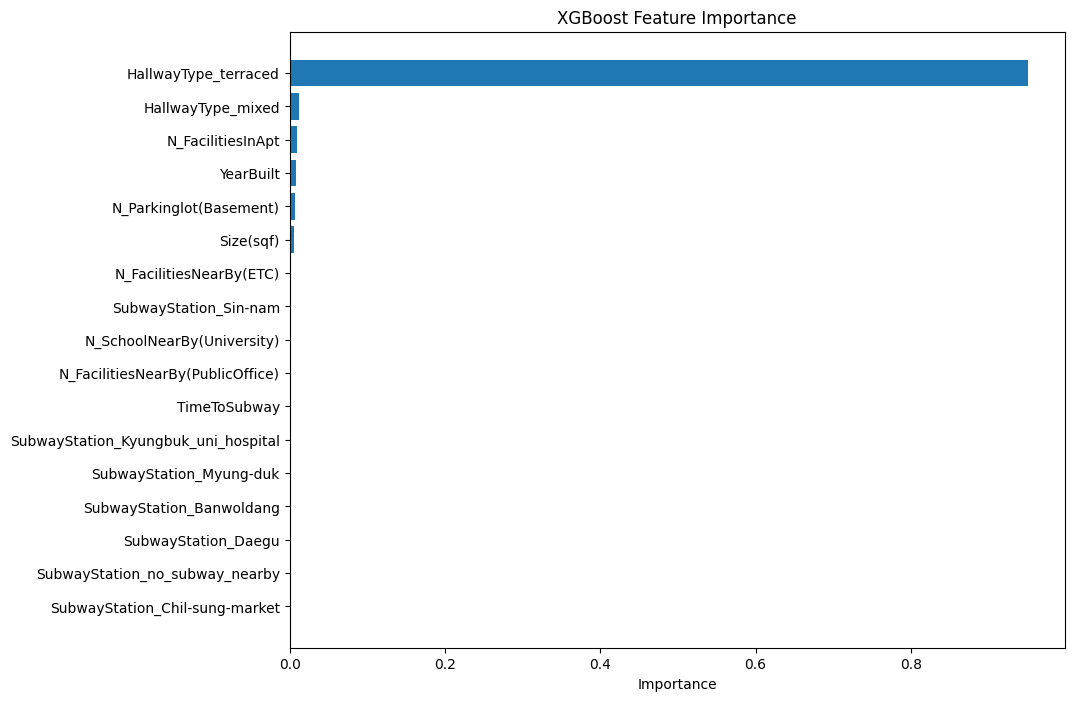

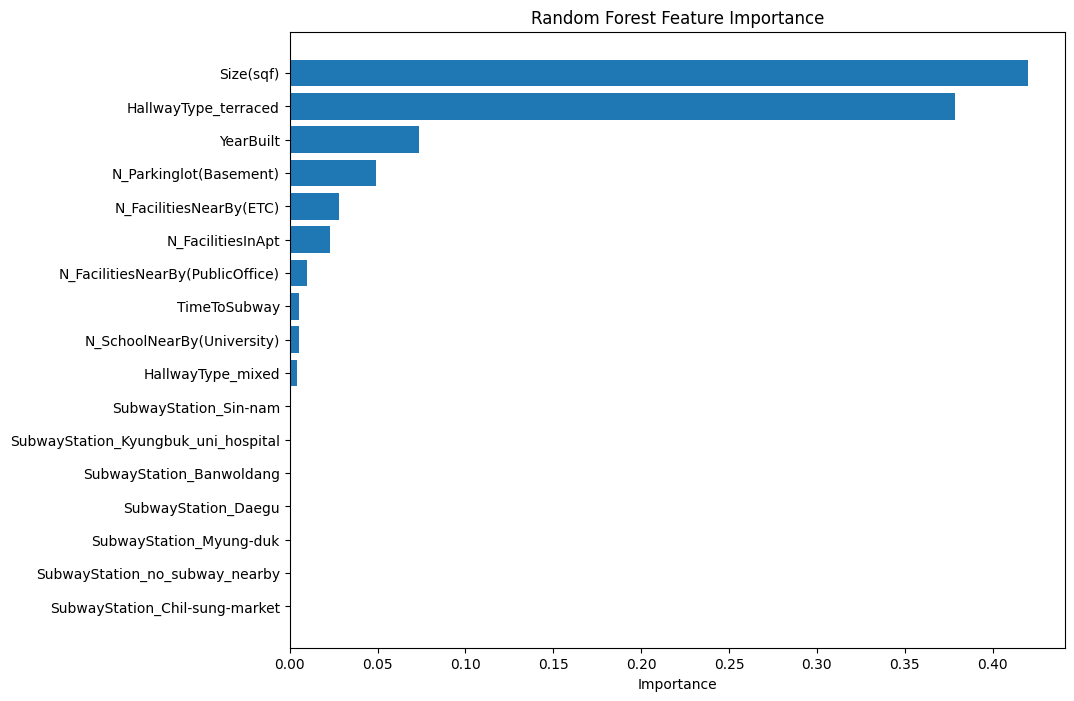

In [27]:
import matplotlib.pyplot as plt

# Extract the feature importances from the XGBoost model
xgb_model = models['XGB']
xgb_model.fit(preprocessor.fit_transform(X_train), y_train)

# Extract feature names after preprocessing
feature_names = preprocessor.named_transformers_['num'].get_feature_names_out()\
                .tolist() + preprocessor.transformers_[1][2] + \
                preprocessor.transformers_[2][1].get_feature_names_out(['HallwayType']).tolist() + \
                preprocessor.transformers_[3][1].get_feature_names_out(['SubwayStation']).tolist()

# Plotting feature importance for XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_sorted_idx = np.argsort(xgb_importances)

plt.figure(figsize=(10, 8))
plt.barh(np.array(feature_names)[xgb_sorted_idx], xgb_importances[xgb_sorted_idx])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.show()

# Extract the feature importances from the Random Forest model
rf_model = models['RandomForest']
rf_model.fit(preprocessor.fit_transform(X_train), y_train)

# Plotting feature importance for Random Forest
rf_importances = rf_model.feature_importances_
rf_sorted_idx = np.argsort(rf_importances)

plt.figure(figsize=(10, 8))
plt.barh(np.array(feature_names)[rf_sorted_idx], rf_importances[rf_sorted_idx])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()


**Insights:**

The Random Forest shows a more balanced importance distribution accross all feature, while XGBoost seem exclusively focuse only on one feature. 

**Insights:**
- This 10 features are the most impactful feature. Using less feature makes the model more simple and might generalize better when dealling with new data

#### Feature set 2

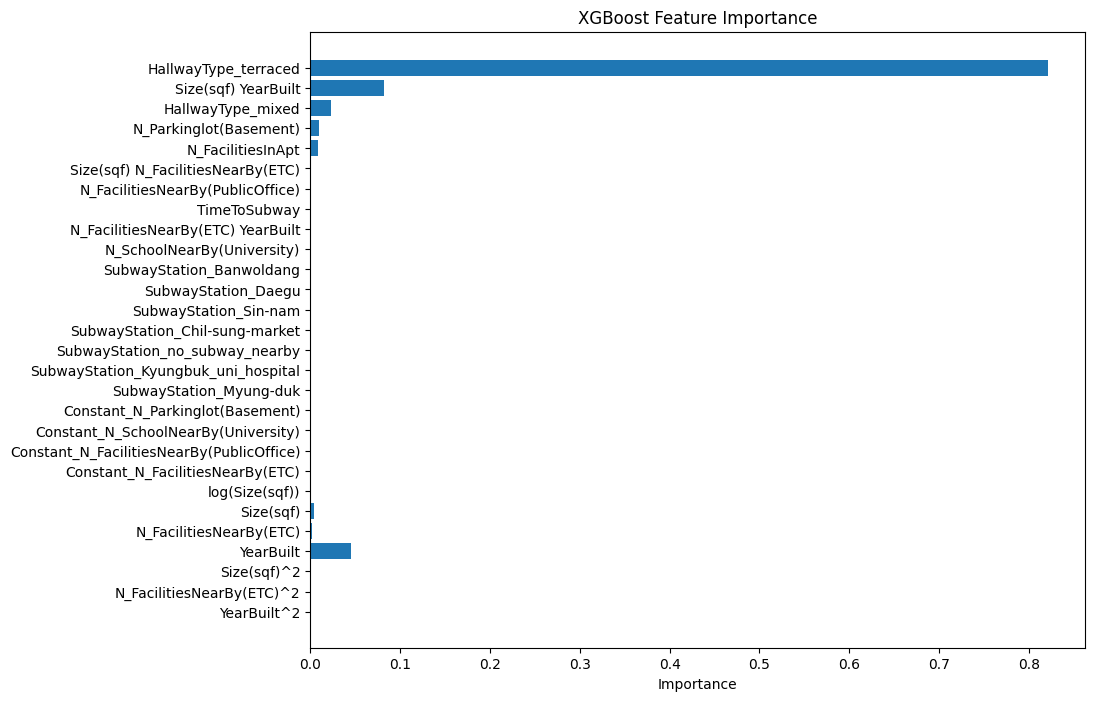

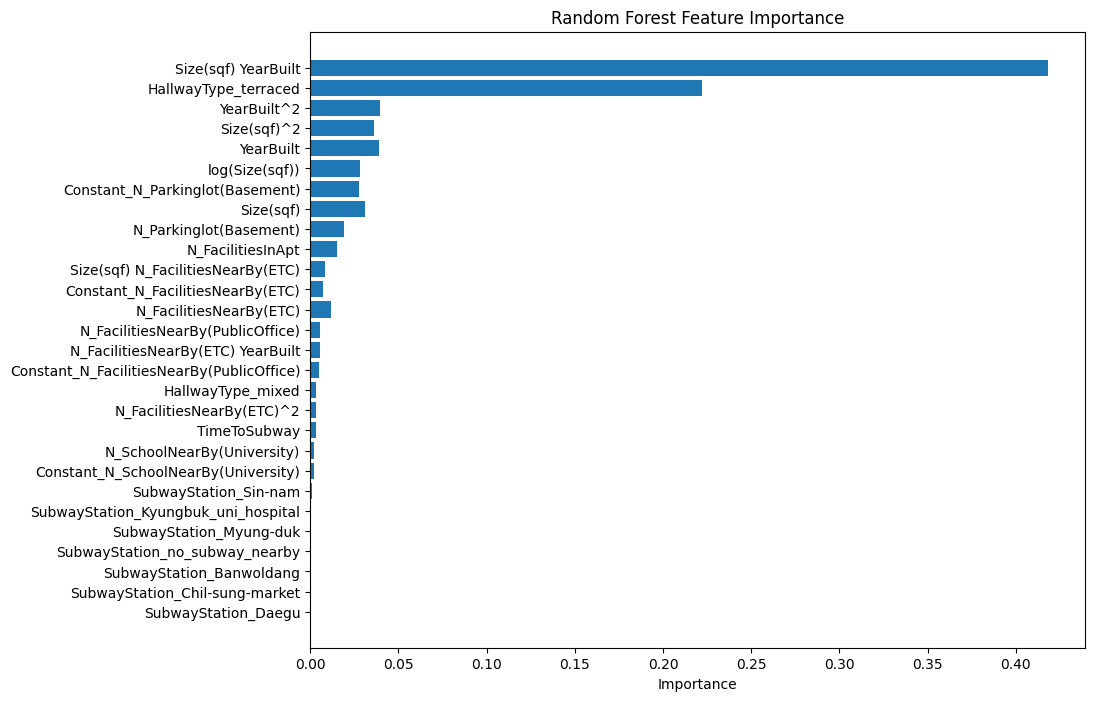

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the XGBoost model
xgb_model_1 = models_1['XGB']
X1_train_transformed = preprocessor_1.fit_transform(X1_train)
xgb_model_1.fit(X1_train_transformed, y1_train)

# Extracting feature names
feature_names_1 = []

# Numerical features after imputation
imputed_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                    'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
                    'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']
feature_names_1.extend(imputed_features)

# Constant added features (the output of the add_constant transformer is not typically named differently)
feature_names_1.extend(['Constant_' + feature for feature in ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                                                             'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)']])

# Ordinal encoded features
feature_names_1.append('TimeToSubway')

# One-hot encoded features
hallway_features = preprocessor_1.named_transformers_['hallway'].get_feature_names_out(['HallwayType']).tolist()
subway_features = preprocessor_1.named_transformers_['subway'].get_feature_names_out(['SubwayStation']).tolist()
feature_names_1.extend(hallway_features)
feature_names_1.extend(subway_features)

# Log transformed features
log_size_feature = ['log(Size(sqf))']
feature_names_1.extend(log_size_feature)

# Polynomial and interaction features
poly_features = preprocessor_1.named_transformers_['poly_interactions'].get_feature_names_out(
    ['Size(sqf)', 'N_FacilitiesNearBy(ETC)', 'YearBuilt']).tolist()
feature_names_1.extend(poly_features)

# Ensure the number of feature names matches the transformed data
if len(feature_names_1) != X1_train_transformed.shape[1]:
    raise ValueError(f"Number of feature names ({len(feature_names_1)}) does not match number of features in the transformed data ({X1_train_transformed.shape[1]}).")

# Plotting feature importance for XGBoost
xgb_importances_1 = xgb_model_1.feature_importances_
xgb_sorted_idx_1 = np.argsort(xgb_importances_1)

plt.figure(figsize=(10, 8))
plt.barh(np.array(feature_names_1)[xgb_sorted_idx_1], xgb_importances_1[xgb_sorted_idx_1])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.show()

# Fit the Random Forest model
rf_model_1 = models_1['RandomForest']
rf_model_1.fit(X1_train_transformed, y1_train)

# Plotting feature importance for Random Forest
rf_importances_1 = rf_model_1.feature_importances_
rf_sorted_idx_1 = np.argsort(rf_importances_1)

plt.figure(figsize=(10, 8))
plt.barh(np.array(feature_names_1)[rf_sorted_idx_1], rf_importances_1[rf_sorted_idx_1])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()


**Insights:**
- random forrest' importance is more balanced


## Tunning Random Forest and XGBoost

#### Feature set 1

In [29]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Custom business loss function
def loss_cost(y_pred, y_true):
    overpredict_cost = 100  # Cost of over-prediction
    opl = np.where(y_pred > y_true, (y_pred - y_true) * overpredict_cost, 0)
    return np.sum(opl)

loss_scorer = make_scorer(loss_cost, greater_is_better=False)

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'model__regressor__n_estimators': [100, 200, 300],
    'model__regressor__max_depth': [None, 10, 20, 30],
    'model__regressor__min_samples_split': [2, 5, 10],
    'model__regressor__min_samples_leaf': [1, 2, 4],
    'model__regressor__bootstrap': [True, False]
}

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'model__regressor__learning_rate': [0.01, 0.1, 0.2],
    'model__regressor__n_estimators': [100, 200, 300],
    'model__regressor__max_depth': [3, 5, 7],
    'model__regressor__subsample': [0.6, 0.8, 1.0],
    'model__regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'model__regressor__gamma': [0, 0.1, 0.2]
}

# Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

results_tuned = {
    'Model': [],
    'Mean_RMSE': [],
    'Std_RMSE': [],
    'Mean_MAE': [],
    'Std_MAE': [],
    'Mean_MAPE': [],
    'Std_MAPE': [],
    'Mean_loss': [],
    'Std_loss': []
}

# GridSearchCV for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=1), func=np.log, inverse_func=np.exp))
])

grid_search_rf = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid_rf, cv=kf, 
                              scoring={'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
                                       'neg_mean_absolute_error': 'neg_mean_absolute_error',
                                       'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error',
                                       'loss_scorer': loss_scorer}, 
                              refit='neg_mean_absolute_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Store the results for Random Forest
rf_results = grid_search_rf.cv_results_
results_tuned['Model'].append('Random Forest Tuned')
results_tuned['Mean_RMSE'].append(-np.mean(rf_results['mean_test_neg_root_mean_squared_error']))
results_tuned['Std_RMSE'].append(np.std(rf_results['mean_test_neg_root_mean_squared_error']))
results_tuned['Mean_MAE'].append(-np.mean(rf_results['mean_test_neg_mean_absolute_error']))
results_tuned['Std_MAE'].append(np.std(rf_results['mean_test_neg_mean_absolute_error']))
results_tuned['Mean_MAPE'].append(-np.mean(rf_results['mean_test_neg_mean_absolute_percentage_error']))
results_tuned['Std_MAPE'].append(np.std(rf_results['mean_test_neg_mean_absolute_percentage_error']))
results_tuned['Mean_loss'].append(-np.mean(rf_results['mean_test_loss_scorer']))
results_tuned['Std_loss'].append(np.std(rf_results['mean_test_loss_scorer']))

# GridSearchCV for XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', TransformedTargetRegressor(regressor=XGBRegressor(random_state=1), func=np.log, inverse_func=np.exp))
])

grid_search_xgb = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid_xgb, cv=kf, 
                               scoring={'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
                                        'neg_mean_absolute_error': 'neg_mean_absolute_error',
                                        'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error',
                                        'loss_scorer': loss_scorer}, 
                               refit='neg_mean_absolute_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Store the results for XGBoost
xgb_results = grid_search_xgb.cv_results_
results_tuned['Model'].append('XGBoost Tuned')
results_tuned['Mean_RMSE'].append(-np.mean(xgb_results['mean_test_neg_root_mean_squared_error']))
results_tuned['Std_RMSE'].append(np.std(xgb_results['mean_test_neg_root_mean_squared_error']))
results_tuned['Mean_MAE'].append(-np.mean(xgb_results['mean_test_neg_mean_absolute_error']))
results_tuned['Std_MAE'].append(np.std(xgb_results['mean_test_neg_mean_absolute_error']))
results_tuned['Mean_MAPE'].append(-np.mean(xgb_results['mean_test_neg_mean_absolute_percentage_error']))
results_tuned['Std_MAPE'].append(np.std(xgb_results['mean_test_neg_mean_absolute_percentage_error']))
results_tuned['Mean_loss'].append(-np.mean(xgb_results['mean_test_loss_scorer']))
results_tuned['Std_loss'].append(np.std(xgb_results['mean_test_loss_scorer']))

# Convert results to DataFrame
results_tuned_df = pd.DataFrame(results_tuned)

# Display results
print('Results after Hyperparameter Tuning feature set 1')
results_tuned_df


Results after Hyperparameter Tuning feature set 1


,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_loss,Std_loss
0,Random Forest Tuned,41316.923736,108.196211,31963.293363,97.313681,0.164646,0.000340,9.418881e+08,4.420757e+06
1,XGBoost Tuned,44156.980677,5855.949475,34763.024698,4963.180480,0.179816,0.026971,1.095245e+09,2.459042e+08


**Analysis**:

- Random forest Model Outperfoms XGBoost across most metrics with lower RMSE, MAE, MAPE and significant Mean Loss compared to XGBoost


In [30]:
# Best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best hyperparameters for Random Forest:")
print(best_params_rf)

# Best hyperparameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_
print("\nBest hyperparameters for XGBoost:")
print(best_params_xgb)


Best hyperparameters for Random Forest:
{'model__regressor__bootstrap': False, 'model__regressor__max_depth': 10, 'model__regressor__min_samples_leaf': 1, 'model__regressor__min_samples_split': 2, 'model__regressor__n_estimators': 100}

Best hyperparameters for XGBoost:
{'model__regressor__colsample_bytree': 0.8, 'model__regressor__gamma': 0, 'model__regressor__learning_rate': 0.2, 'model__regressor__max_depth': 3, 'model__regressor__n_estimators': 200, 'model__regressor__subsample': 0.6}


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer
import numpy as np
import pandas as pd

# Custom business loss function
def loss_cost(y_pred, y_true):
    overpredict_cost = 100  # Cost of over-prediction
    opl = np.where(y_pred > y_true, (y_pred - y_true) * overpredict_cost, 0)
    return np.sum(opl)

loss_scorer = make_scorer(loss_cost, greater_is_better=False)

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'model__regressor__n_estimators': [100, 200, 300],
    'model__regressor__max_depth': [None, 10, 20, 30],
    'model__regressor__min_samples_split': [2, 5, 10],
    'model__regressor__min_samples_leaf': [1, 2, 4],
    'model__regressor__bootstrap': [True, False]
}

# Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is predefined
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=1), 
        func=np.log, inverse_func=np.exp
    ))
])

grid_search_rf = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid_rf, cv=kf, 
                              scoring={'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
                                       'neg_mean_absolute_error': 'neg_mean_absolute_error',
                                       'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error',
                                       'loss_scorer': loss_scorer}, 
                              refit='neg_mean_absolute_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Extract the best model
best_rf_pipeline = grid_search_rf.best_estimator_

# Display the best pipeline
print("Best Pipeline for Random Forest:")
best_rf_pipeline


Best Pipeline for Random Forest:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)']),
                                                 ('time_subway',
                                                  OrdinalEncoder(categories=[['0-5min',
                                                                              '5min~10...
                                                                              '20min~25min',
                                                                              '25min~30min',
                                                                              '30min~',
                                                                              'no_bus_stop_nearby']]),
                                                  ['TimeToSubway']),
                                                 ('hallway',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType']),
                                                 ('subway',
                                                  OneHotEncoder(drop='first'),
                                                  ['SubwayStation'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(bootstrap=False,
                                                                            max_depth=10,
                                                                            random_state=1)))])

In [32]:
# Step 1: Evaluate the model on the training set

# Select the best model from GridSearchCV for Random Forest (as an example)
best_rf_model = grid_search_rf.best_estimator_

# Predictions on the training set
y_train_pred = best_rf_model.predict(X_train)

# Calculate training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_loss = loss_cost(y_train_pred, y_train)

# Step 2: Evaluate the model on the test set

# Predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate test metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_loss = loss_cost(y_test_pred, y_test)

# Step 3: Compare the results
comparison_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'Business Loss'],
    'Training Set': [train_rmse, train_mae, train_mape, train_loss],
    'Test Set': [test_rmse, test_mae, test_mape, test_loss]
})

# Display the comparison
print("Comparison of Training and Test Errors for Random Forest")
print(comparison_df)


Comparison of Training and Test Errors for Random Forest
          Metric  Training Set      Test Set
0           RMSE  3.973106e+04  3.994422e+04
1            MAE  3.065251e+04  3.042719e+04
2           MAPE  1.579208e-01  1.618596e-01
3  Business Loss  3.559330e+09  1.145120e+09


**Inteprattion:**
- there is no sifnificant over fitting as the error on the training and test set are very close. 
- there is similarity in performance metrics across both datasets indicates tht the nodel is stable and robust

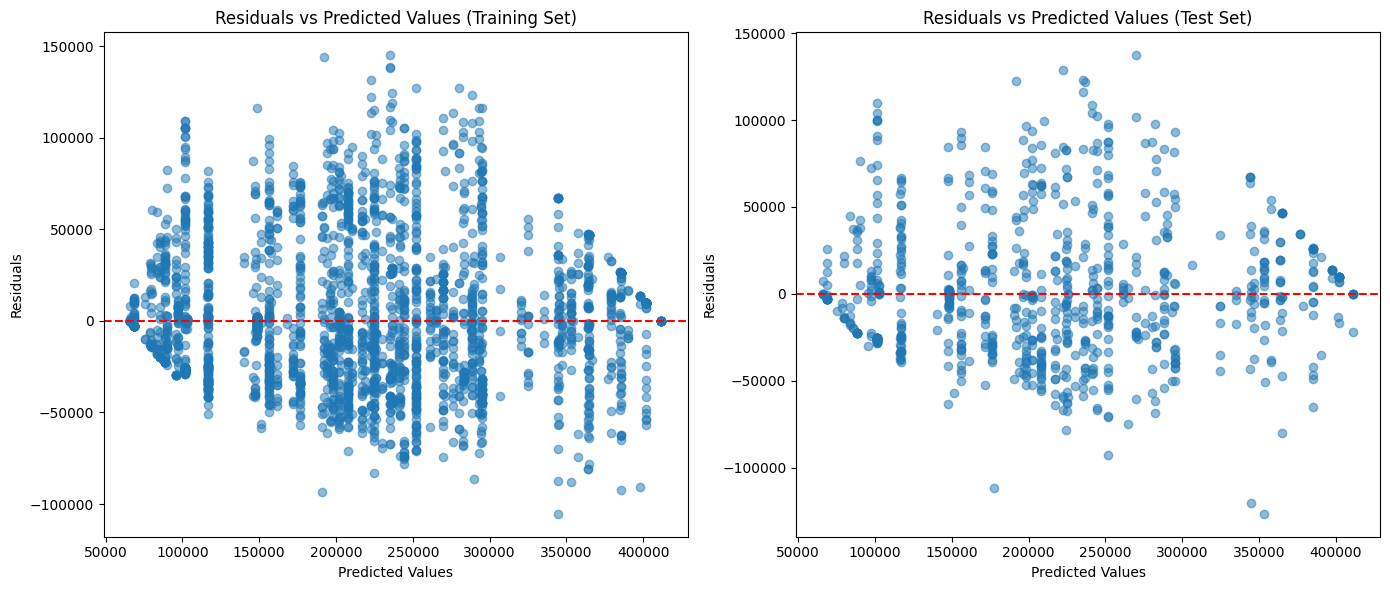

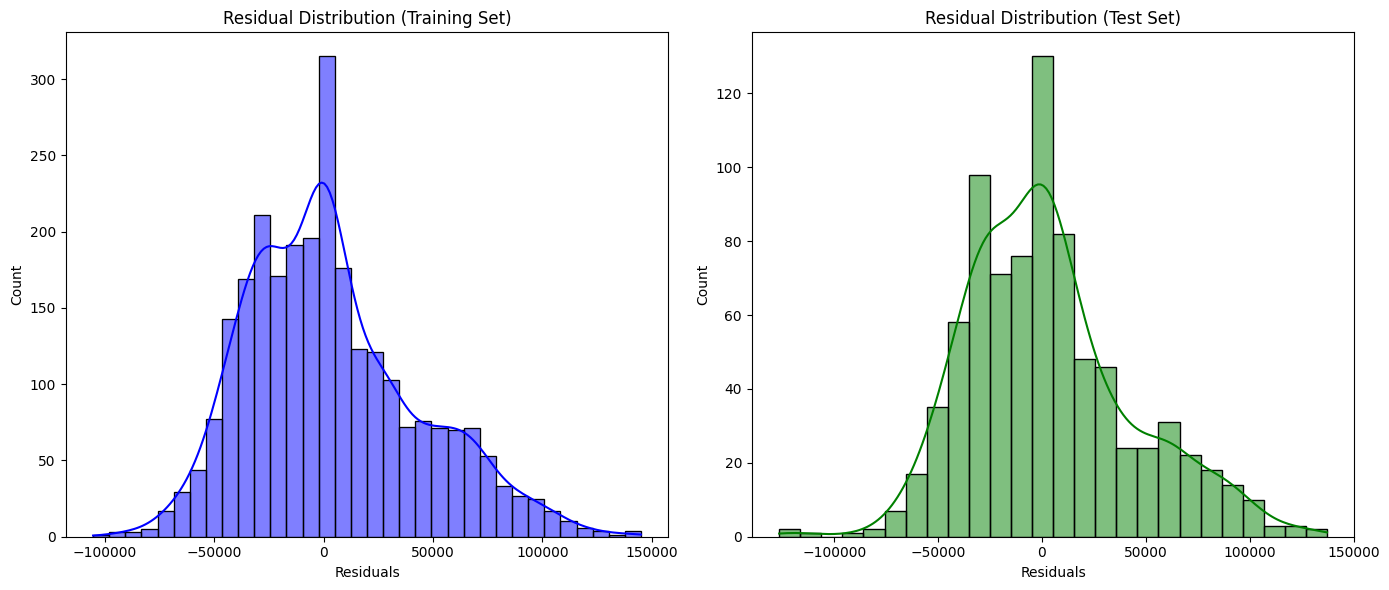

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Residuals vs. Predicted Values Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Residual Histogram
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, color='blue')
plt.title('Residual Distribution (Training Set)')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, color='green')
plt.title('Residual Distribution (Test Set)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


**Intepretation**
- Both residuals behavior in their distribution and randomness across predited values shows that the model is performing well, no major over or under fitting
- There is slightly skewness in the residual distribution in the test set, but it is not significant

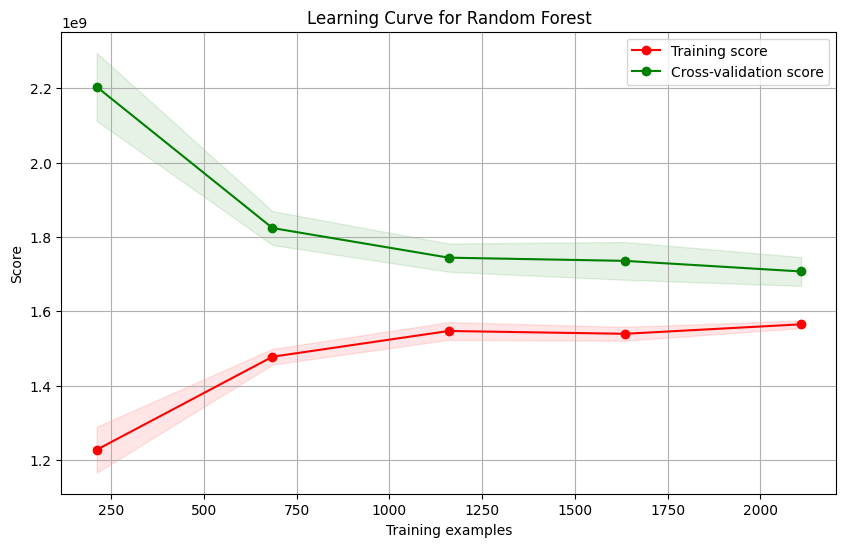

In [34]:
from sklearn.model_selection import learning_curve

# Define the function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Use the best Random Forest model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Plot the learning curve
plot_learning_curve(best_rf_model, "Learning Curve for Random Forest", X_train, y_train, cv=5, n_jobs=-1)
plt.show()


**Insights:**

- The small gap between the training and cross validation score indicates that the model is not overfitting

- It generalizes well which is showed by the cross validation curve improving with the more data


## Evaluate on the test set unseen data

In [35]:
# Use the best model after hyperparameter tuning
best_rf_model = grid_search_rf.best_estimator_

# Refit the model on the entire training set
best_rf_model.fit(X_train, y_train)

# Predictions on the test set (unseen data)
y_unseen_pred = best_rf_model.predict(X_test)

# Calculate metrics on the test set
test_rmse_unseen = np.sqrt(mean_squared_error(y_test, y_unseen_pred))
test_mae_unseen = mean_absolute_error(y_test, y_unseen_pred)
test_mape_unseen = mean_absolute_percentage_error(y_test, y_unseen_pred)
test_loss_unseen = loss_cost(y_unseen_pred, y_test)

# Display the results
test_results_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'Business Loss'],
    'Test Set (Unseen Data)': [test_rmse_unseen, test_mae_unseen, test_mape_unseen, test_loss_unseen]
})

print("Final Evaluation on Test Set (Unseen Data)")
test_results_df


Final Evaluation on Test Set (Unseen Data)


,Metric,Test Set (Unseen Data)
0,RMSE,3.994422e+04
1,MAE,3.042719e+04
2,MAPE,1.618596e-01
3,Business Loss,1.145120e+09


**Intepretation**
-  The results on this test set are consistent with performance observed during cross validation and on the data validation. 
- the similarity between the training/ val errors and the test errors sshows that the model doesnt not have significant over or under fitting
- Model ready for deplayment


## **Finalize the Model**

### **Finalize the final model by fittting it with the whole seen data**

In [36]:
X_train_val = df_seen.drop(columns='SalePrice')
y_train_val = df_seen['SalePrice']

In [37]:
#define the final random forrest with the best hyperparameter

final_rf_model= RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=False,
    random_state=42)

#wrap with Transformedtargetregressor
final_model= TransformedTargetRegressor(regressor=final_rf_model, func=np.log, inverse_func=np.exp)

#Pipeline with preprocessing and model
final_pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_model)
])

final_pipeline.fit(X_train_val, y_train_val)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)']),
                                                 ('time_subway',
                                                  OrdinalEncoder(categories=[['0-5min',
                                                                              '5min~10...
                                                                              '20min~25min',
                                                                              '25min~30min',
                                                                              '30min~',
                                                                              'no_bus_stop_nearby']]),
                                                  ['TimeToSubway']),
                                                 ('hallway',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType']),
                                                 ('subway',
                                                  OneHotEncoder(drop='first'),
                                                  ['SubwayStation'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(bootstrap=False,
                                                                            max_depth=10,
                                                                            random_state=42)))])

In [38]:
final_pipeline.fit(X_train_val, y_train_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)']),
                                                 ('time_subway',
                                                  OrdinalEncoder(categories=[['0-5min',
                                                                              '5min~10...
                                                                              '20min~25min',
                                                                              '25min~30min',
                                                                              '30min~',
                                                                              'no_bus_stop_nearby']]),
                                                  ['TimeToSubway']),
                                                 ('hallway',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType']),
                                                 ('subway',
                                                  OneHotEncoder(drop='first'),
                                                  ['SubwayStation'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(bootstrap=False,
                                                                            max_depth=10,
                                                                            random_state=42)))])

In [39]:
# # final_model = grid_search_rf.best_estimator_
# final_model.fit(X_train, y_train) 

In [40]:
import joblib
joblib.dump(best_rf_model, 'final_random_forest_model.pkl')


['final_random_forest_model.pkl']

### **Feature Important**

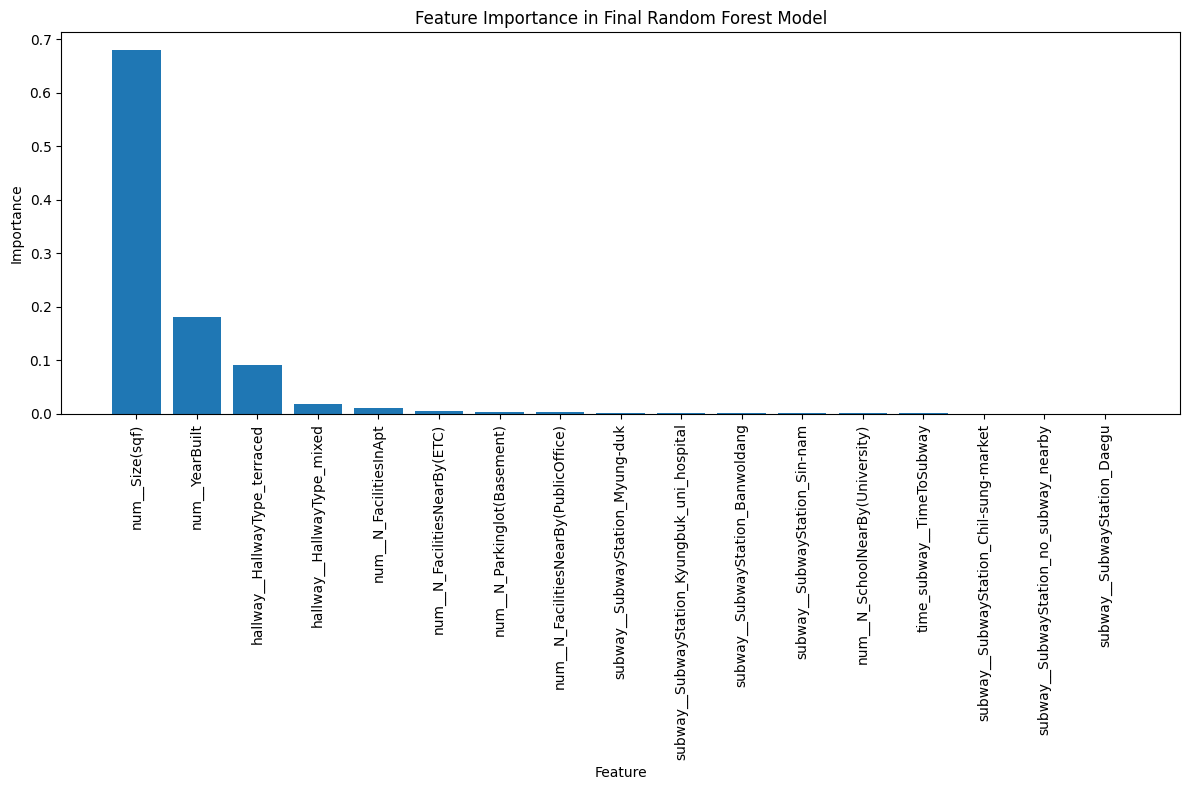

In [61]:
#extract RF from Pipeline
rf_model= final_pipeline.named_steps['model'].regressor_

#get featur importances
importances_features= rf_model.feature_importances_

#get feature names after preprocessing
feature_names= final_pipeline.named_steps['preprocessor'].get_feature_names_out()

indices= np.argsort(importances_features)[::-1]

#plot the feature importances

plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Final Random Forest Model")
plt.bar(range(len(importances_features)), importances_features[indices], align="center")
plt.xticks(range(len(importances_features)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

##### **Observation**

- **The most important feature** scored over 60%: **Size squarefeet**. It indicates that larger appartments are significantly more expensive, making it very important fsctore in price determination.It is linear to the actual business context.

- **num_yearbuilt** scored almost 20% of te moel's predictive power. it is also logical that newer appartment tend to be more expensive.

- **other feature** e.g hallway__HallwayType_mixed, num__N_FacilitiesInApt, range only 1% to 3 % intrepetates  that they contribute marginally to the paprtment prices prediction. 
- subway station and nearby facilites has importance score  less than 1%. This suggests that in Daegu, this amenities dont affect apartment prices . 

<h4 style='text-align:left; color:cyan'><b> Model Confidence Level </b></h4>

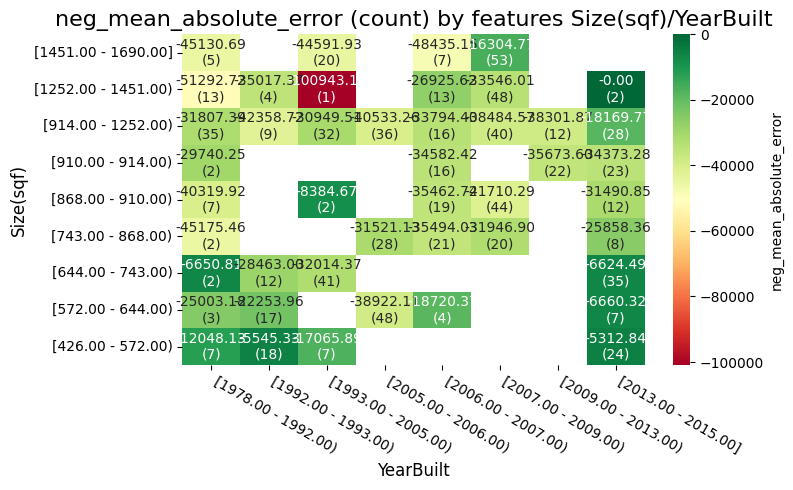

In [86]:
from SegmentPerformance import *

test_df = df_unseen.copy()

# SegmentPerformanceTest with your top 3 features
test = SegmentPerformanceTest(
    feature_1='Size(sqf)',           
    feature_2='YearBuilt',           
    alternative_scorer='neg_mean_absolute_error',
    max_segments=10,                   
    max_cat_proportions=2)          

# Run the test with your final model and the unseen test data
test.run(estimator=final_pipeline, data=test_df, target_label='SalePrice')


**INtepretation:**

The heatmap shows how accurately our model predicts apartment prices based on size (sqf) and year of construction.The neg_mean_absolute_error value (MAE) shows how close the prediction is to the actual price. Lower numbers mean higher accuracy.

**Key Information:**

- **High Accuracy in Key Segments:**
This model performs very well for medium-sized apartments (572-914 sqf) built between 2006 and 2015, with an error of about -$8,384.67. This shows strong reliability in this segment.

- **Consistent Performance with Older Mid-Sized Apartments:**
This model maintains reasonable accuracy for medium-sized apartments (914-1451 sqf) built before 2006, with errors ranging from -$29,740.25 to -$53,348.48. These errors are manageable, so this model is also effective for these properties.

**Higher Error in Certain Segments:**
This model has more significant errors

This model is very reliable for predicting the price of a new standard-sized apartment. This model is very powerful in this segment, offering accurate assessments that you can trust. While there are some challenges with extreme property sizes, these are areas we can focus on improving. Overall, this model is a reliable tool for making accurate pricing decisions, so you stay competitive.


**Actionable Insights:**
- focus on refining model or collecting more data for ssgements with high percentage errors.
- might also need to adjust the model to handle these specific  segment better. 

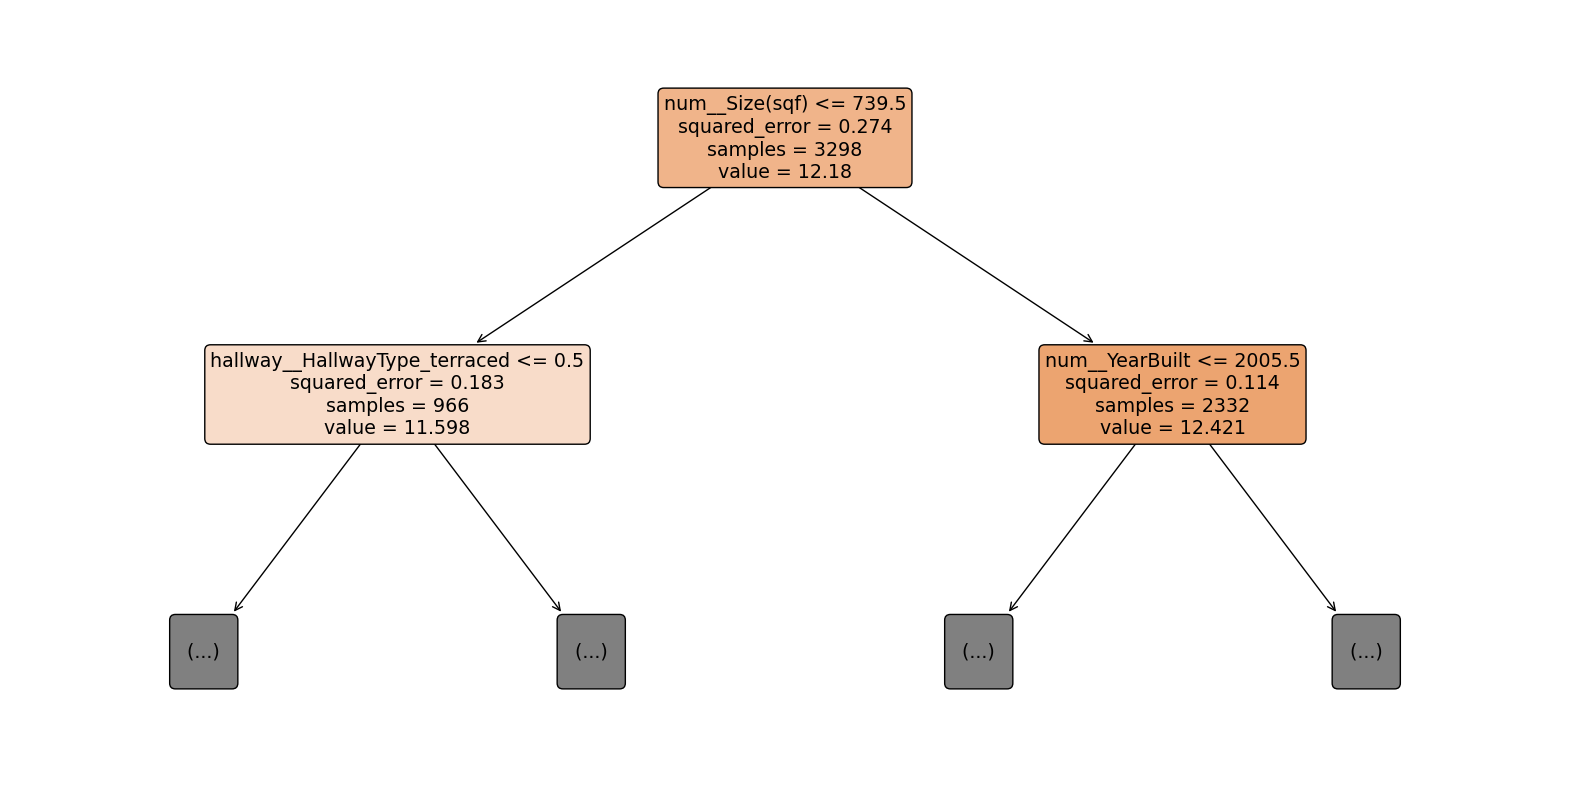

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract the first tree from the RandomForestRegressor in the pipeline
tree_model = final_pipeline.named_steps['model'].regressor_.estimators_[0]

# Assuming you have feature names from the preprocessor
feature_names = final_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=feature_names, 
          filled=True, 
          rounded=True,
          max_depth=1)  # Visualize only the top level (root and one level of children)
plt.show()


### Final Model Intepretation

Final Model Decision Tree Interpretation
Root Node:

Features: Size (square feet) <= 739.5
Key Insight: The model first considers the size of the apartment, which shows that size is the most important factor in predicting prices. Smaller apartments (<= 739.5 square feet) are handled differently than larger ones.
Impact: This division reduces the variance in the predicted price, which indicates that size is the main determinant.

Left Branch (First Division):

Features: Aisle Type (Terraced) <= 0.5
Key Insight: For smaller apartments, the model checks if the aisle type is non-tiered, which indicates that the aisle style affects the price prediction.
Impact: The model captures value differences based on aisle type, which further refines price estimates for smaller apartments.

Right Branch (First Separation):

Feature: Year Built <= 2005.5
Key Insight: For larger apartments, the model considers the year of construction, with older apartments (built before 2005) treated differently than newer ones.
Impact: This division indicates that newer apartments tend to be rated higher, which further reduces the variance of the prediction.



## **Key Qestions**

#### **How the model work**

##### The final model is designed to predict apartment price in Daegu, South Korea using Random Foress with these parameters:

- **n_estimators=100**: this hyperparameter specifies number of decission trees in the forrest. A value of 200 strikes a balance between performance and computational efficiency, ensuring the model is acccurate without being too slow

- **max_depth=10**: This limits the maximum ndepth (number of slipts before reaching the a leaf node) of each decission tree. max deoth of 10 allows the model to be complex enough to camture important patterns, but not so complex that it overfits.

- **min_samples_split=2**: the minimum number of split in internal node is 2.

- **min_samples_leaf=1**: the number of sample that must present is in a leaf noe is 1. This setting creates nodes that contain a single sample makes the model with the flexibility to make very specific predictions. Hower it might cause over fitting. in this context, it is used to capture subtle variations in the data.

- **bootstrap=False**: when it is false, the entire dataset is used to build each tree, rather than a random subset. this helo model more stable but slighty less diverse in its prediction. 


The Random Forest model is designed to predict apartment prices in Daegu by combining the predictions of multiple decision trees. 

Each tree looks at the different features of the apartment and makes its own price prediction. 

The final price prediction is the average of all these individual predictions. 

The model settings are carefully selected to ensure accuracy, reliability, and function well with the new data, thus providing a reliable estimate of the price of the apartment.

**How Random Forest Regression Predicts Apartment Prices:**

**Input Data:**
This model takes various features of the apartment as input, such as the size in square feet, the year of its construction, and other relevant characteristics.

**Building a Decision Tree:**
Random Forest Regressor builds several decision trees during training. Each tree is built by dividing the data based on input features, creating branches that lead to different predicted outcomes (apartment prices).

Every tree in the forest makes a prediction for the price of the apartment.

**Gathering Predictions:**
Once all the trees have made their predictions, the Random Forest model collects these predictions by averaging them. This averaging process helps to reduce the variance of the prediction, making the final prediction more accurate and robust.





### **Profit and loss analysis**

Profit and Loss Analysis

When analyzing profit and loss in the context of real estate prices, it is important to consider Over Prediction Loss (OPL) and Under Prediction Loss (UPL). Since UPL is an immediate financial loss and you have chosen to focus on OPL, the following analysis will focus on the impact of overestimating property prices.

1. Over Prediction Loss (OPL):
OPL Components:
Holding Cost:
    Tax: 0.25% per annum
    Maintenance: 2% per year
    Insurance: 0.15% per annum

This fee is calculated based on the over-predicted amount and the time the property is not sold.


**Example calculation:**


Assumption: The average property price is $207,964.
Over-Prediction: If the property price is predicted to be more than $20,000.
Unsold Period: The property is unsold for 60 days.

Annual Storage Fee:

    Tax: $20,000 * 0.25% = $50/year
    Maintenance: $20,000 * 2% = $400/year
    Insurance: $20,000 * 0.15% = $30/year

Total Annual Storage Costs:

    $50 (Tax) + $400 (Maintenance) + $30 (Insurance) = $480/year


Monthly Storage Fee:

    $480/year is equivalent to $40/month.
    So, for 60 days (about 2 months):
    OPL = $40/month x 2 months = $80

2. Profit and Loss Implications:

Over-Prediction Scenario:
If the price is predicted to be too high and the property remains unsold for 60 days, the business will incur an additional $80 storage fee.
The longer the property is unsold, the higher the storage costs, thus increasing the OPL.

3. Practical Application:

OPL calculation: Storage costs (taxes, maintenance, and insurance) should be considered for each property, depending on how much of the prediction is overestimated and how long the property has not been sold.

Impact Model:
Models should be adjusted to minimize over-prediction, reducing the likelihood of incurring storage costs.

4. Conclusion:

OPL Focus: By minimizing over-prediction, businesses can reduce unnecessary storage costs, which has a direct impact on profitability. The calculation example highlights the seemingly small potential for over-prediction costs, which emphasizes the importance of an accurate pricing model.

This analysis shows that while over-forecasting may initially seem less dangerous than under-forecasting, over-forecasting can still lead to significant financial losses, especially if the property is not sold for an extended period of time. Accurate predictions are essential to minimize OPL and UPL, ensuring the business maximizes its profitability.





### **Conclusion and Recomendation**

#### Conclusion:

Based on the modeling process, the 'Size(sqf)', 'Year Built', and 'HallwayType_teras' features emerged as the most influential factors in predicting apartment prices in Daegu. The model was evaluated using RMSE, MAE, and MAPE, with the Random Forest model set achieving an average RMSE of around 41,316, an MAE of around 31,963, and a MAPE of around 16.5%. This metric shows that the model is providing fairly accurate predictions, although there is still room for improvement.

A heatmap analysis of model errors, particularly neg_mean_absolute_percentage_error in the various segments of 'Size(sqf)' and 'Year Built', highlights that the model performs better with newer and larger apartments, while smaller and older apartments tend to have higher prediction errors. This suggests that the model may be biased towards certain property types, leading to less accurate predictions in other segments.


#### Recomendation

**Improving Accuracy on High Error Segments:**

- **Focus on Small and Old Apartments:** Improve feature engineering for these properties, perhaps by including additional data about the condition or amenities of the apartment.
- **Rebalance Training Data:** Adjust the model training process to give more attention to underrepresented segments such as old and small apartments.

**Improve Feature Engineering:**

- **Add Relevant Features:** Incorporate additional features such as location, proximity to amenities, and renovation history to better capture factors that affect pricing in challenging segments.

- **Enhance Existing Features**: Consider more detailed versions of features such as 'Year Built' to account for upgrades or renovations.

**Continuous Model Monitoring:**
- **Regular Evaluation:** Monitor and update the model regularly to adapt to market changes, especially with a focus on high-error segments.
- **Iterative Improvement:** Use continuous error analysis to make targeted adjustments and continuously refine the model.


**Testing in the Real World:**
- **A/B testing:** Compare the model's predictions with traditional pricing methods to assess their impact on sales and identify areas that need further improvement.


These steps will help refine the model, reduce prediction errors, and improve overall accuracy, resulting in more reliable apartment price predictions in Daegu.
